In [12]:
import numpy as np
from scipy import random
import matplotlib.pyplot as plt
from scipy.stats import t
import statistics
import seaborn as sns 

In [13]:
class Jeucarte:
    def __init__(self):
        self.deck=26*['black']+26*['red']
        random.shuffle(self.deck)
    def draw(self):
        return self.deck.pop()

In [14]:
N=52#nombre de cartes
K=26

In [15]:
Number_Red_cards_drawn=0
Number_black_cards_drawn=0
Total_Cards_drawn=0
jeu=Jeucarte()
List_prob_black=[]
List_prob_red=[]
list_Confiance_min=[]
list_Confiance_max=[]
list_diff=[]
print(jeu.deck)
while len(jeu.deck) != 0:
    current_card_drawn=jeu.draw()
    Total_Cards_drawn+=1
    n=N-Total_Cards_drawn#Total cards remaining
    if current_card_drawn=='black':
        Number_black_cards_drawn+=1
    else:
        Number_Red_cards_drawn+=1
    if (n==0) and current_card_drawn=='red':
        Proba_red=1
    elif (n==0) and current_card_drawn=='black':
        Proba_black=1
    else:
        Proba_red=(K-Number_Red_cards_drawn)/n
        Proba_black=(K-Number_black_cards_drawn)/n
    List_prob_black.append(Proba_black)
    List_prob_red.append(Proba_red)
    list_diff.append(Proba_red-Proba_black)
#     if n*Proba_red > 5 and n*(1-Proba_red)>5:
#         min_intervalle_confiance=Proba_red-1.96*np.sqrt(Proba_red*(1-Proba_red)/n)
#         max_intervalle_confiance=Proba_red+1.96*np.sqrt(Proba_red*(1-Proba_red)/n)
#         list_Confiance_min.append(min_intervalle_confiance)
#         list_Confiance_max.append(max_intervalle_confiance)
    
    



['black', 'black', 'black', 'red', 'red', 'red', 'black', 'black', 'black', 'black', 'red', 'red', 'black', 'red', 'red', 'black', 'red', 'black', 'black', 'black', 'black', 'red', 'red', 'black', 'red', 'black', 'black', 'red', 'black', 'black', 'red', 'red', 'red', 'red', 'black', 'black', 'red', 'red', 'black', 'black', 'black', 'red', 'red', 'red', 'red', 'black', 'red', 'black', 'black', 'red', 'red', 'red']


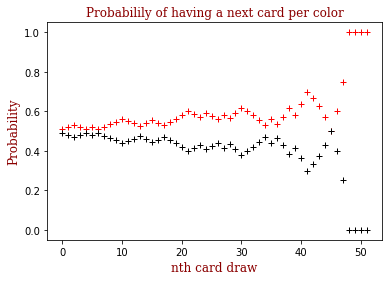

In [16]:
x=range(52)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
plt.title("Probabilily of having a next card per color", fontdict=font)
#plt.rcParams["figure.figsize"] = [27, 3.5]
#plt.rcParams["figure.autolayout"] = True
plt.plot(x, List_prob_black,'+', color='red')
plt.plot(x, List_prob_red,'+', color='black')
plt.xlabel('nth card draw', fontdict=font)
plt.ylabel("Probability", fontdict=font)
#plt.xticks(x)
plt.show()

In [17]:
# print(len(list_Confiance_max))
# print(len(list_Confiance_min))
# y=range(len(list_Confiance_min))
# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#         'size': 12,
#         }
# plt.title("confidence interval Variation", fontdict=font)
# #plt.rcParams["figure.figsize"] = [27, 3.5]
# #plt.rcParams["figure.autolayout"] = True
# plt.plot(y, list_Confiance_min,'-', color='red')
# plt.plot(y, list_Confiance_max,'-', color='black')
# plt.xlabel('nth card draw', fontdict=font)
# plt.ylabel("Probability", fontdict=font)
# # plt.xticks(x)
# plt.show()

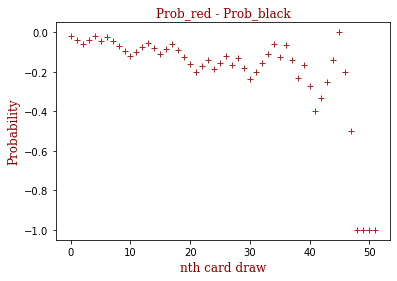

In [18]:
y=range(52)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
plt.title("Prob_red - Prob_black", fontdict=font)
#plt.rcParams["figure.figsize"] = [27, 3.5]
#plt.rcParams["figure.autolayout"] = True
plt.plot(y, list_diff,'+', color='brown')
plt.xlabel('nth card draw', fontdict=font)
plt.ylabel("Probability", fontdict=font)
#plt.xticks(x)
plt.show()

In [19]:
nb_simulations=1000
nb_jeux_par_simulations=1000
jeu_succes=0
jeu_echec=0


In [20]:
for j in range(nb_simulations):#Simutation en utilisant un seuil sur Prob_b et Prob_b - Prob_a
    for i in range(nb_jeux_par_simulations):
        Number_Red_cards_drawn=0
        Number_black_cards_drawn=0
        Total_Cards_drawn=0
        
        jeu=Jeucarte()
        while len(jeu.deck) != 0:
            current_card_drawn=jeu.draw()
            Total_Cards_drawn+=1
            n=N-Total_Cards_drawn#Total cards remaining
            if current_card_drawn=='black':
                Number_black_cards_drawn+=1
            else:
                Number_Red_cards_drawn+=1
            if (n==0) and current_card_drawn=='red':
                Proba_red=1
                jeu_succes+=1
                Stop_Card=current_card_drawn
                break
                
                
                
            elif (n==0) and current_card_drawn=='black':
                Proba_black=1
                jeu_echec+=1
                Stop_Card=current_card_drawn
                break
                
                
            else:
                Proba_red=(K-Number_Red_cards_drawn)/n
                Proba_black=(K-Number_black_cards_drawn)/n
#             if n*Proba_red > 5 and n*(1-Proba_red)>5:
#                 min_intervalle_confiance=Proba_red-1.96*np.sqrt(Proba_red*(1-Proba_red)/n)
#                 max_intervalle_confiance=Proba_red+1.96*np.sqrt(Proba_red*(1-Proba_red)/n)
            if (Proba_red>0.6)  :
                Stop_Card=jeu.draw()
                current_card_drawn=Stop_Card
                if Stop_Card=="red":
                    jeu_succes+=1
                else:
                    jeu_echec+=1
                break
                    
        
    

In [21]:
print(jeu_succes/(jeu_succes+jeu_echec))

0.499904


In [22]:
list_freq=[]
list_freq_jeu=[]
jeu_succes=0
jeu_echec=0
for j in range(nb_simulations):#Simutation en utilisant un seuil sur Prob_b 
    jeu_succes=0
    jeu_echec=0
    for i in range(nb_jeux_par_simulations):
        Number_Red_cards_drawn=0
        Number_black_cards_drawn=0
        Total_Cards_drawn=0
        
        jeu=Jeucarte()
        while len(jeu.deck) != 0:
            current_card_drawn=jeu.draw()
            Total_Cards_drawn+=1
            n=N-Total_Cards_drawn#Total cards remaining
            if current_card_drawn=='black':
                Number_black_cards_drawn+=1
            else:
                Number_Red_cards_drawn+=1
            if (n==0) and current_card_drawn=='red':
                Proba_red=1
                jeu_succes+=1
                Stop_Card=current_card_drawn
                break
                
                
                
            elif (n==0) and current_card_drawn=='black':
                Proba_black=1
                jeu_echec+=1
                Stop_Card=current_card_drawn
                break
                
                
            else:
                Proba_red=(K-Number_Red_cards_drawn)/n
                Proba_black=(K-Number_black_cards_drawn)/n
#             if n*Proba_red > 5 and n*(1-Proba_red)>5:
#                 min_intervalle_confiance=Proba_red-2.58*np.sqrt(Proba_red*(1-Proba_red)/n)
#                 max_intervalle_confiance=Proba_red+2.58*np.sqrt(Proba_red*(1-Proba_red)/n)
            if (Proba_red>0.5)  :
                Stop_Card=jeu.draw()
                current_card_drawn=Stop_Card
                if Stop_Card=="red":
                    jeu_succes+=1
                else:
                    jeu_echec+=1
                break
                
    list_freq.append(float(jeu_succes/(jeu_succes+jeu_echec)))

In [23]:
print(np.mean(list_freq))
print(len(list_freq))

0.499408
1000


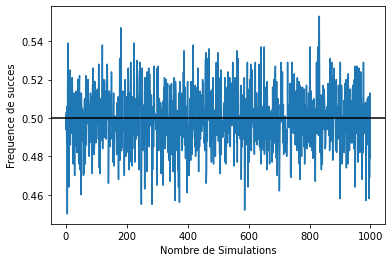

In [24]:
plt.plot(list(range(len(list_freq))), list_freq)
plt.axhline(0.5, color='k')
plt.xlabel('Nombre de Simulations')
plt.ylabel('Frequence de succes')
plt.show()

In [25]:
#Confidence Interval
m = np.mean(list_freq)
s = np.var(list_freq)
dof = len(list_freq)-1
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
min_intervalle_confiance=m-t_crit*np.sqrt(m*(1-m)/len(list_freq))
max_intervalle_confiance=m+t_crit*np.sqrt(m*(1-m)/len(list_freq))
print(min_intervalle_confiance)
print(max_intervalle_confiance)

0.4683806789271186
0.5304353210728815


In [26]:
def compute_high_confidence_interval(likelihoods, bin_width,bin_edges):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    print('arg max: '+ str(peak_index))
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        print(str(start_index) + ' ' + str(end_index + 1) + ' ' + str(area*100) +'%')
        area = likelihoods[start_index: end_index + 1].sum() * bin_width
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index



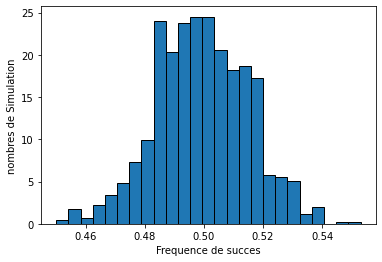

In [27]:
x = range(len(list_freq))

patches=plt.hist(list_freq, bins='auto',edgecolor='black', density=True)
plt.xlabel('Frequence de succes')
plt.ylabel('nombres de Simulation')
plt.show()


arg max: 11
10 14 10.100000000000136%
9 15 38.50000000000014%
8 16 54.400000000000134%
7 17 72.00000000000014%
6 18 83.2000000000002%
5 19 88.60000000000021%
4 20 92.90000000000022%
The frequency range 0.466480 - 0.528280 represents a 96.40% confidence interval


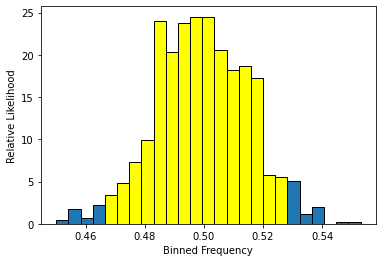

In [28]:
likelihoods, bin_edges, patches = plt.hist(list_freq, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width,bin_edges)
 
for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
 
plt.show()


In [29]:
jeu_succes=0
jeu_echec=0
for j in range(nb_simulations):#Simutation en laissant La derniére Carte = Stop_cart
    for i in range(nb_jeux_par_simulations):
        Number_Red_cards_drawn=0
        Number_black_cards_drawn=0
        Total_Cards_drawn=0
        
        jeu=Jeucarte()
        while len(jeu.deck) != 0:
            current_card_drawn=jeu.draw()
            Total_Cards_drawn+=1
            n=N-Total_Cards_drawn#Total cards remaining
            if current_card_drawn=='black':
                Number_black_cards_drawn+=1
            else:
                Number_Red_cards_drawn+=1
            if (n==0) and current_card_drawn=='red':
                Proba_red=1
                jeu_succes+=1
                Stop_Card=current_card_drawn
                break
                
                
                
            elif (n==0) and current_card_drawn=='black':
                Proba_black=1
                jeu_echec+=1
                Stop_Card=current_card_drawn
                break
                
                
            

In [30]:
print(jeu_succes/(jeu_succes+jeu_echec))
print(jeu_succes)

0.49985
499850


In [31]:
jeu_succes=0
jeu_echec=0
for j in range(nb_simulations):#Simutation en laissant La permiere Carte = Stop_cart
    for i in range(nb_jeux_par_simulations):
        Number_Red_cards_drawn=0
        Number_black_cards_drawn=0
        Total_Cards_drawn=0
        
        jeu=Jeucarte()
        while len(jeu.deck) != 0:
            current_card_drawn=jeu.draw()
            Total_Cards_drawn+=1
            n=N-Total_Cards_drawn#Total cards remaining
            if current_card_drawn=='black':
                Number_black_cards_drawn+=1
            else:
                Number_Red_cards_drawn+=1
            if current_card_drawn=='red':
                Proba_red=1
                jeu_succes+=1
                Stop_Card=current_card_drawn
                break
                
                
                
            elif current_card_drawn=='black':
                Proba_black=1
                jeu_echec+=1
                Stop_Card=current_card_drawn
                break
                
                
            else:
                Proba_red=(K-Number_Red_cards_drawn)/n
                Proba_black=(K-Number_black_cards_drawn)/n
#             if n*Proba_red > 5 and n*(1-Proba_red)>5:
#                 min_intervalle_confiance=Proba_red-2.58*np.sqrt(Proba_red*(1-Proba_red)/n)
#                 max_intervalle_confiance=Proba_red+2.58*np.sqrt(Proba_red*(1-Proba_red)/n)
#             if (Proba_red>0.6)  :
#                 Stop_Card=jeu.draw()
#                 current_card_drawn=Stop_Card
                if Stop_Card=="red":
                    jeu_succes+=1
                else:
                    jeu_echec+=1
                break

In [32]:
print(jeu_succes/(jeu_succes+jeu_echec))#

0.500196
